In [254]:
import numpy as np
import pandas as pd
from sympy import symbols, linsolve, nonlinsolve, Matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

### 3.5

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [90]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

In [91]:
#  это задание решается с помощью псевдообратной матрицы (для переопределенных систем)

X = Matrix([[50,1], [60,1], [70,1], [100,1]])       #  матрица признаков (тривиальный х принимается за 1)
Y = Matrix([10, 15, 40, 45])                    #   вектор ответов

In [92]:
X

Matrix([
[ 50, 1],
[ 60, 1],
[ 70, 1],
[100, 1]])

In [93]:
X_inv = (X.T*X)**-1*X.T         #  по формуле псевдообратной матрицы
X_inv

Matrix([
[-1/70, -1/140,   0, 3/140],
[  5/4,    3/4, 1/4,  -5/4]])

In [94]:
W = X_inv*Y
W                     #  вектор весов

Matrix([
[  5/7],
[-45/2]])

In [95]:
w0, w1 = symbols('w0, w1')
X_aug = Matrix([[50,1,10], [60,1,15], [70,1,40], [100,1,45]])
nonlinsolve(X_aug, [w0,w1])           #  вариант с расширенной матрицей ничего не даёт

EmptySet

In [96]:
reg = LinearRegression().fit(X, Y)
reg.coef_                             #  в модели лин. регрессии совпадает один коэффициент, второй почему-то не найден

array([[0.71428571, 0.        ]])

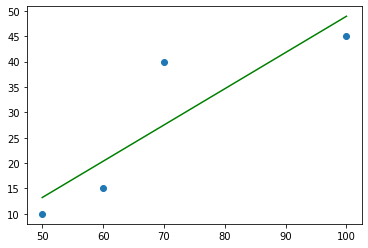

In [97]:
X_sup = np.linspace(50, 100)
plt.scatter(x_hw, y_hw)
plt.plot(X_sup, W[0]*X_sup + W[1], c='g')         #  рашение через псевдообратную матрицу выглядит правильным
plt.show()

### 3.7

У вас есть два набора точек – истинные значения *y_true* и предсказанные значения *y_pred*

* для каждой точки из *y_true* постройте величину ошибки $e = y-\hat{y}$ – это называется **остатки регрессии**
* возведите ошибки в квадрат $e^2$
* постройте график ошибок – зависимость $e^2$ от $e$

In [98]:
y_pred = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3,\
                    20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06,\
                    8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, \
                    20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0,\
                    21.0, 24.7, 30.8])

In [99]:
errors = y_pred - y_true
errors

array([ 6.  ,  3.43, -4.13, -4.79, -8.26, -3.44,  0.1 , -7.56, -4.98,
        0.02,  4.  ,  2.69, -0.79, -0.85,  1.08, -0.6 , -2.57, -0.59,
       -4.02,  0.21, -1.08, -1.93,  0.63, -0.69,  0.08, -0.51, -1.14,
       -0.09,  1.15, -0.12, -1.24,  3.56, -4.39,  1.18,  0.21,  4.91,
        2.34,  2.11, -1.78,  0.56])

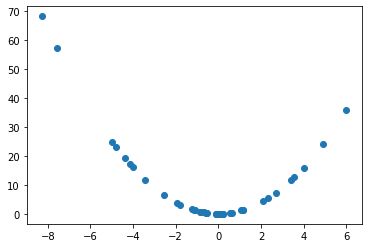

In [100]:
plt.scatter(errors, errors**2)     #  это ведь не график MSE (функция MSE зависит от коэффициентов)? 
#  смысл задания непонятен

### 3.9

Даны точки $x$ и значения в этих точках $y$. Нормализуйте $y$ с помощью *z-score* и постройте график зависимости нормализованных значений от $x$. Для графика используйте `.scatter(x,y_tansformed)`

In [109]:
X = np.linspace(1,10,num=10)
Y = np.array([1.,  3.,  4.,  2., 10.,  5.,  5.,  2.,  5., 10.], dtype=np.float32)

In [118]:
Y_z = Y.reshape(-1,1)
scaler = StandardScaler()
Y_z = scaler.fit(Y_z).transform(Y_z)
Y_z

array([[-1.2465616 ],
       [-0.57274455],
       [-0.23583598],
       [-0.9096531 ],
       [ 1.7856153 ],
       [ 0.10107257],
       [ 0.10107257],
       [-0.9096531 ],
       [ 0.10107257],
       [ 1.7856153 ]], dtype=float32)

(-2, 11)

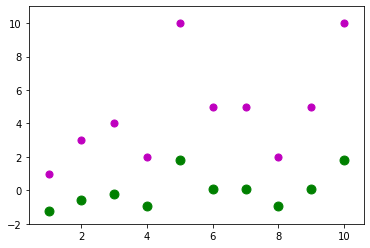

In [142]:
plt.scatter(X, Y, s=50, c='m')
plt.scatter(X, Y_z, s=80, c='g')
plt.ylim(-2,11)         #  все же непонятно, зачем трансформировать данные на выходе (и на входе тоже - мы ведь теряем информацию)
#  или частью информации приходится пожертвовать, чтобы получить более надежное предсказание для основной части данных?

### 3.11.1

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [203]:
trains_df = pd.read_csv('3.10_non_linear.csv')
trains_df

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


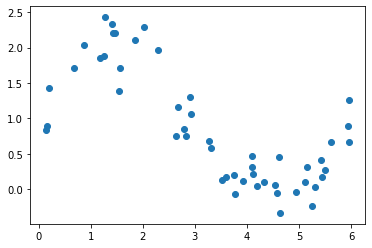

In [204]:
plt.scatter(trains_df['x_train'], trains_df['y_train'])

In [214]:
reg = LinearRegression().fit(trains_df[['x_train']], trains_df['y_train'])
Y_predict = reg.predict(trains_df[['x_train']])
Y_predict[:10]

array([1.92263843, 1.91631157, 1.9057668 , 1.73915947, 1.67589087,
       1.57255215, 1.54935366, 1.5430268 , 1.49873878, 1.49030296])

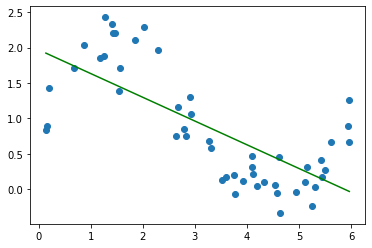

In [216]:
plt.scatter(trains_df['x_train'], trains_df['y_train'])
plt.plot(trains_df['x_train'], Y_predict, c='g')            #  простая линейная модель

In [224]:
def get_polynome(power):                            #  функция для получения полинома заданной степени
    return np.array([(trains_df['x_train']**p) for p in range(1, power+1)]).T
get_polynome(3)

array([[1.38368445e-01, 1.91458266e-02, 2.64917826e-03],
       [1.57236870e-01, 2.47234331e-02, 3.88743523e-03],
       [1.88684243e-01, 3.56017437e-02, 6.71748808e-03],
       [6.85552751e-01, 4.69982575e-01, 3.22197847e-01],
       [8.74236995e-01, 7.64290323e-01, 6.68170875e-01],
       [1.18242126e+00, 1.39812003e+00, 1.65316685e+00],
       [1.25160548e+00, 1.56651628e+00, 1.96066037e+00],
       [1.27047391e+00, 1.61410395e+00, 2.05067694e+00],
       [1.40255288e+00, 1.96715457e+00, 2.75903830e+00],
       [1.42771078e+00, 2.03835806e+00, 2.91018576e+00],
       [1.47173710e+00, 2.16601009e+00, 3.18779740e+00],
       [1.53463185e+00, 2.35509491e+00, 3.61420364e+00],
       [1.55350027e+00, 2.41336309e+00, 3.74916022e+00],
       [1.84281611e+00, 3.39597122e+00, 6.25815048e+00],
       [2.01892141e+00, 4.07604364e+00, 8.22921175e+00],
       [2.28936882e+00, 5.24120960e+00, 1.19990618e+01],
       [2.64157941e+00, 6.97794177e+00, 1.84327873e+01],
       [2.68560573e+00, 7.21247

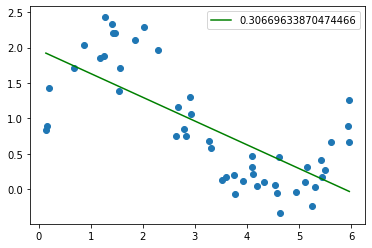

In [236]:
def train_model(power): 
    X_poly = get_polynome(power)
    reg = LinearRegression().fit(X_poly, trains_df['y_train'])
    Y_poly = reg.predict(X_poly)
    
    mse = mean_squared_error(trains_df['y_train'], Y_poly)

    plt.scatter(trains_df['x_train'], trains_df['y_train'])
    plt.plot(trains_df['x_train'], Y_poly, c='g')
    plt.legend(labels=[mse])
    
train_model(1)              #  функция для обучения модели регрессии заданной степени

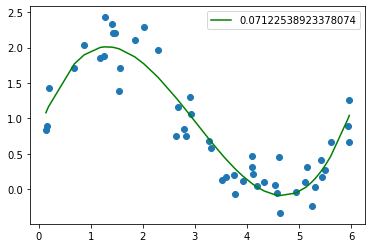

In [237]:
train_model(3)

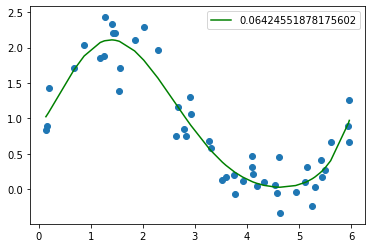

In [240]:
train_model(6)

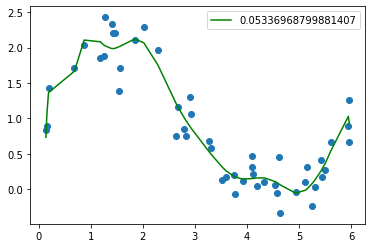

In [253]:
train_model(14)          #  полином 14 степени дает минимальную mse (дальше mse снова растет)

### 3.11.2
**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [405]:
#  надеюсь, задание понято правильно

class CustomLinearReg:

    def __init__(self):                   #  в конструктор вроде бы ничего передавать не нужно
        pass
    
    def fit(self, X, y):
        self.X = Matrix()                                #  рассчитано из sympy, не numpy, потому что так удобнее
        self.y = Matrix()
        w = ((X.T*X)**-1*X.T)*y
        return np.array(w, dtype=float).reshape(1,2)
    
    def predict(self, X):
        w = ((X.T*X)**-1*X.T)*y
        return np.ravel(np.array(X*w, dtype=float)) 

In [406]:
X = Matrix([[50,1], [60,1], [70,1], [100,1]])
y = Matrix([10, 15, 40, 45]) 
c_reg = CustomLinearReg()
c_reg.fit(X,y)

array([[  0.71428571, -22.5       ]])

In [407]:
c_reg.predict(X)

array([13.21428571, 20.35714286, 27.5       , 48.92857143])

In [408]:
class CustomLinearReg:

    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X = Matrix()
        self.y = Matrix()
        if not isinstance(self.X, Matrix) or isinstance(self.y, Matrix):       #  при попытке включить проверку:
            raise TypeError('data must belong to class Matrix')             #  ?? почему это условие ведет себя так странно
        else:
            w = ((X.T*X)**-1*X.T)*y
            return np.array(w, dtype=float).reshape(1,2)
    
#    def predict(self, X):
#        w = ((X.T*X)**-1*X.T)*y
#        return np.ravel(np.array(X*w, dtype=float))

In [409]:
X = Matrix([[50,1], [60,1], [70,1], [100,1]])
y = Matrix([10, 15, 40, 45]) 
c_reg = CustomLinearReg()
c_reg.fit(X,y)                                  #  ?? должно быть все наоборот

TypeError: data must belong to class Matrix

### 3.11.3
**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [270]:
from sklearn.datasets import fetch_california_housing     #  в док. указано, что boston имеет этическую проблему и будет устранен
housing = fetch_california_housing()
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [271]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [272]:
X = housing.data
Y = housing.target
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.20)      #  разделение данных

In [274]:
reg = LinearRegression().fit(X_train, Y_train)            #  обучение тренировочного датасета
Y_train_pred = reg.predict(X_train)
Y_train_pred

array([2.65801242, 3.10511204, 1.05646841, ..., 4.11836396, 1.00434671,
       1.99611749])

In [275]:
reg = LinearRegression().fit(X_valid, Y_valid)                    #  обучение тестового датасета
Y_valid_pred = reg.predict(X_valid)
Y_valid_pred

array([1.74970245, 1.47116438, 1.69823008, ..., 1.40723076, 1.73770132,
       2.27659739])

In [276]:
r2_score(Y_valid, Y_valid_pred)               #  коэффициент детерминации скорее близок к 1 (это хорошо)

0.636496982310268

In [280]:
scaler = StandardScaler()                                                          #  нормализация трен.датасета
Y_train_z = scaler.fit(Y_train.reshape(-1,1)).transform(Y_train.reshape(-1,1))
reg = LinearRegression().fit(X_train, Y_train_z)
Y_train_z_pred = reg.predict(X_train)
Y_train_z_pred

array([[ 0.51630658],
       [ 0.90434847],
       [-0.87368828],
       ...,
       [ 1.78375918],
       [-0.91892519],
       [-0.05815815]])

In [281]:
scaler = StandardScaler()                                                           #  нормализация тестового датасета
Y_valid_z = scaler.fit(Y_valid.reshape(-1,1)).transform(Y_valid.reshape(-1,1))
reg = LinearRegression().fit(X_valid, Y_valid_z)
Y_valid_z_pred = reg.predict(X_valid)
Y_valid_z_pred

array([[-0.29345607],
       [-0.53345423],
       [-0.33780646],
       ...,
       [-0.58854168],
       [-0.30379666],
       [ 0.16053508]])

In [282]:
r2_score(Y_valid_z, Y_valid_z_pred)     #  показатель не изменился по отношению к нормализованным данным 
                       #  (вероятно, потому что z-нормализация меняет только масштаб данных, но не само распределение)

0.6364969823102677

In [283]:
r2_score(Y_valid, Y_valid_z_pred)       #  но стал значительно хуже по отношению к исходным данным   (непонятно почему)

-2.619509412664039